In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
!python3 -m spacy download en_core_web_sm
import en_core_web_sm
nlp = en_core_web_sm.load()

     |████████████████████████████████| 12.0 MB 2.4 MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011738 sha256=34ce436ebf488ea9c9022548e0fcf4f94e9f5b8f79fda194b6bb52512d41a65b
  Stored in directory: /private/var/folders/cj/s5f8hsj96095h24ccd2941j80000gn/T/pip-ephem-wheel-cache-xxiod98h/wheels/51/19/da/a3885266a3c241aff0ad2eb674ae058fd34a4870fef1c0a5a0
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [6]:
import pandas as pd
import numpy as np
# import spacy # !python3 -m spacy download en_core_web_sm
# nlp=spacy.load('en_core_web_sm') #nlp = en_core_web_sm.load()
df=pd.read_csv('kaggle-world-cup-2018-tweets.csv')
print(df.shape[0])
df.head()

530000


,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
0,1013597060640145408,en,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,Cayleb,Accra,861,828
1,1013597056219295744,en,2018-07-02 01:35:44,Twitter for Android,139,RT @FCBarcelona: ?? @ivanrakitic scores the wi...,scores the winning penalty to send into the qu...,0,1031,WorldCup,"FC Barcelona,Ivan Rakitic,HNS | CFF","FCBarcelona,ivanrakitic,HNS_CFF",Febri Aditya,Bogor,667,686
2,1013597047482544130,en,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game....,Tonight we have big game,0,488,worldcup,"Javier Fernandez,Evgeni Plushenko","javierfernandez,EvgeniPlushenko",??,NaN,65,67
3,1013597044198391808,en,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe...,We get stronger Turn the music up now We got t...,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague","EXO,FIFA World Cup ?","weareoneEXO,FIFAWorldCup",Frida Carrillo,"Zapopan, Jalisco",17,89
4,1013597039999926272,en,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,tar,NaN,137,216


In [7]:
df.dropna(inplace=True)
#print(df.size)
#dd = df.dropna(subset=['Tweet']) # drop rows only if the value in 'Tweet' column is missing
#dd

In [8]:
my_list=list(df['Tweet'])
print(len(list(my_list)))

287535


In [11]:
from nltk.stem.snowball import SnowballStemmer
S=SnowballStemmer('english')
new_list=[]
for i in my_list:
    tweet=nlp(str(i))
    my_tweet=[]
    for j in tweet:
        if j.text in nlp.Defaults.stop_words or j.is_punct is True:
            pass
        else:
            my_tweet.append(S.stem(j.text.lower()))
    new_tweet=' '.join(my_tweet)
    new_list.append(new_tweet)



KeyboardInterrupt: 

In [ ]:
import pickle
with open('new_list.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(new_list, filehandle)  

In [14]:
import pickle
new_list=[]
with open('new_list.pickle', 'rb') as filehandle:
    # read the data as binary data stream
    new_list = pickle.load(filehandle)
print(len(new_list))
new_list[:10]

287535


['onli goalkeep save penalti penalti shoot ricardo vs',
 'score win penalti send quarter final face russia',
 'we stronger turn music we got power power',
 'happi win especi know collud russia elimin spain penalti',
 'when when feel feel power power',
 'idek anymor spain portug',
 'know amaz world cup bit excit nacho',
 'penalti shootout in one day',
 'wonder odd messi ronaldo modric miss penalti world cup',
 'lebron news cool pero let get import let go mexico']

In [15]:
y=[]
x=[]
indexes=[]
for index,i in enumerate(new_list):
    if 'foul' in i:
        if i not in x:
            y.append(0)
            x.append(i)
            indexes.append(index)
    elif 'penalti' in i:
        if i not in x:
            y.append(1)
            x.append(i)
            indexes.append(index)
    elif 'goal' in i:
        if i not in x:
            y.append(2)
            x.append(i)
            indexes.append(index)
    elif 'red card' in i:
        if i not in x:
            y.append(3)
            x.append(i)
            indexes.append(index)
    elif 'yellow card' in i :
        if i not in x:
            y.append(4)
            x.append(i)
            indexes.append(index)

    
        
    
        

In [16]:
Y=0
r=0
f=0
p=0
g=0
for i in y:
    if i==0:
        f+=1
    if i==1:
        p+=1
    if i==2:
        g+=1
    if i==3:
        r+=1
    if i==4:
        Y+=1
print('yellow card: '+str(Y))
print('fouls: '+str(f))
print('red card: '+str(r))
print('goals: '+str(g))
print('penalties: '+str(p))

yellow card: 18
fouls: 71
red card: 19
goals: 1898
penalties: 1412


/opt/miniconda3/envs/nlpfinal/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

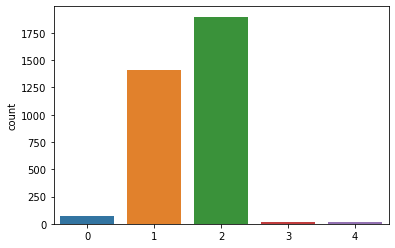

In [17]:
import seaborn as sns 
sns.countplot(y)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(x)

In [20]:
import imblearn
print("imblearn=" + imblearn.__version__)
from imblearn.over_sampling import SMOTE
smote = SMOTE()


X, Y = smote.fit_resample(x,y)
from collections import Counter
print("Before SMOTE :" , Counter(y))
print("After SMOTE :" , Counter(Y))

ImportError: cannot import name 'six' from 'sklearn.externals' (/opt/miniconda3/envs/nlpfinal/lib/python3.7/site-packages/sklearn/externals/__init__.py)

In [ ]:
import seaborn as sns 
sns.countplot(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train,y_train)

In [ ]:
pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test,pred))

In [ ]:
x=S.stem(str(input()).lower())
f=[]
f.append(x)
pred=clf.predict(tfidf.transform(f))

arr=['foul','penalty','goal','red card','yellow card']
print(arr[pred[0]])

In [ ]:
tweets=list(df['Tweet'])
dates=list(df['Date'])
classes=[]
datess=[]
times=[]
tweetss=[]
for i in indexes:
    tweet=nlp(tweets[i])
    my_tweet=[]
    for j in tweet:
        if j.text in nlp.Defaults.stop_words or j.is_punct is True:
            pass
        else:
            my_tweet.append(S.stem(j.text.lower()))
    new_tweet=' '.join(my_tweet)
    f=[]
    f.append(new_tweet)
    pred=clf.predict(tfidf.transform(f))
    arr=['foul','penalty','goal','red card','yellow card']
    classs=arr[pred[0]]
    my_tweett=tweets[i]
    date,time=dates[i].split()
    classes.append(classs)
    tweetss.append(my_tweett)
    datess.append(date)
    times.append(time)
df=pd.DataFrame()
df['tweet']=tweetss
df['date']=datess
df['time']=times
df['type']=classes
    
    
    
    
    
    

In [ ]:
df.head()

In [ ]:
df.to_csv('data2.csv')

In [ ]:
len(tweetss)

In [ ]:
Counter(list(pd.read_csv('data2.csv')['type']))

In [ ]:
len(list(set(tweetss)))